In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [144]:
data = pd.read_csv("loan_approved.csv")

In [145]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [147]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [148]:
(data.isnull().sum()/len(data))*100 #percentage of mising values in a col. if value greater than 50 col can be dropped

Loan_ID                   0.000000
Gender                    2.117264
Married                   0.488599
Dependents                2.442997
Education                 0.000000
Self_Employed             5.211726
ApplicantIncome           0.000000
CoapplicantIncome         0.000000
LoanAmount                3.583062
Loan_Amount_Term          2.280130
Credit_History            8.143322
Property_Area             0.000000
Loan_Status (Approved)    0.000000
dtype: float64

In [149]:
data["LoanAmount"]= data["LoanAmount"].fillna(data["LoanAmount"].median())

In [150]:
data.LoanAmount.isnull().sum()

np.int64(0)

In [151]:
data["CoapplicantIncome"]= data["CoapplicantIncome"].fillna(data["CoapplicantIncome"].median())
data["ApplicantIncome"]= data["ApplicantIncome"].fillna(data["ApplicantIncome"].median())
data["Loan_Amount_Term"]= data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median())
data["Credit_History"]= data["Credit_History"].fillna(data["Credit_History"].median())


In [152]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [153]:
data["Gender"]= data["Gender"].replace("", data['Gender'].mode()[0])
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [154]:
data.Gender.isnull().sum()

np.int64(13)

In [155]:
data["Married"]= data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"]= data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Education"]= data["Education"].fillna(data["Education"].mode()[0])
data["Self_Employed"]= data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["Married"]= data["Married"].fillna(data["Married"].mode()[0])
data["Loan_Status (Approved)"]= data["Loan_Status (Approved)"].fillna(data["Loan_Status (Approved)"].mode()[0])

In [156]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

# Handling outliers

In [157]:
col="ApplicantIncome"
Q1= data[col].quantile(0.25)
Q3= data[col].quantile(0.75)
IQR= Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

print("Lower limit: ",lower_limit)
print("Upper limit: ",upper_limit)

iqr_outlier= data[(data[col]<lower_limit) | (data[col]>upper_limit)]

Lower limit:  -1498.75
Upper limit:  10171.25


In [158]:
data['Capped_'+col]=data[col].clip(lower_limit,upper_limit) #Cap method which changes value below lower bound to lower limit and above upper bound to upper limit

In [159]:
median_val=data[col].median()
data['MedianReplaced'+col]= data[col].mask((data[col]<lower_limit) | (data[col]>upper_limit),median_val)



In [160]:
print(data.loc[13:56,['ApplicantIncome','MedianReplacedApplicantIncome']])

    ApplicantIncome  MedianReplacedApplicantIncome
13             1853                         1853.0
14             1299                         1299.0
15             4950                         4950.0
16             3596                         3596.0
17             3510                         3510.0
18             4887                         4887.0
19             2600                         2600.0
20             7660                         7660.0
21             5955                         5955.0
22             2600                         2600.0
23             3365                         3365.0
24             3717                         3717.0
25             9560                         9560.0
26             2799                         2799.0
27             4226                         4226.0
28             1442                         1442.0
29             3750                         3750.0
30             4166                         4166.0
31             3167            

# Zscore outliers

In [161]:
from scipy import stats

In [162]:
data['zscore']=stats.zscore(data['ApplicantIncome'])
zscore_outliers=data[abs(data['zscore']>3)]
print("Z-Score Outliers:\n", zscore_outliers.ApplicantIncome)

Z-Score Outliers:
 126    23803
155    39999
171    51763
183    33846
185    39147
333    63337
409    81000
443    37719
Name: ApplicantIncome, dtype: int64


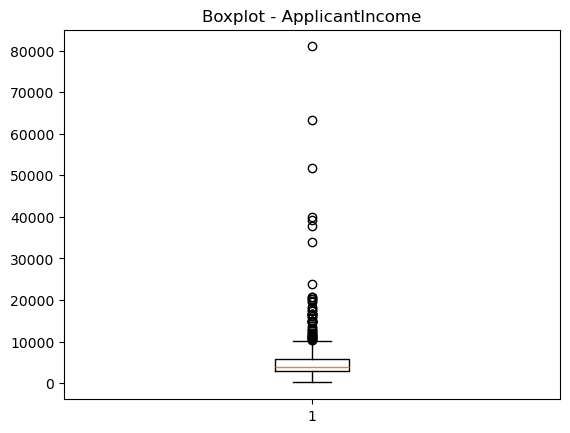

In [163]:
plt.boxplot(data['ApplicantIncome'])
plt.title("Boxplot - ApplicantIncome")
plt.show()


(array([151., 297.,  85.,  36.,  12.,  11.,   8.,   6.,   1.,   0.,   0.,
          0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  2845.,  5540.,  8235., 10930., 13625., 16320., 19015.,
        21710., 24405., 27100., 29795., 32490., 35185., 37880., 40575.,
        43270., 45965., 48660., 51355., 54050., 56745., 59440., 62135.,
        64830., 67525., 70220., 72915., 75610., 78305., 81000.]),
 <BarContainer object of 30 artists>)

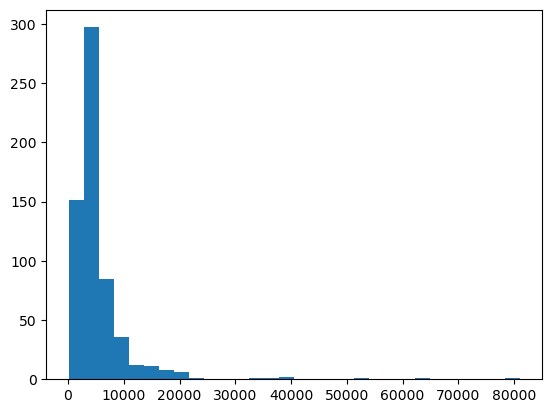

In [164]:
plt.hist(data['ApplicantIncome'], bins=30)

In [165]:
mean=data[col].mean()
std=data[col].std()

lowerLimit= mean-3*std
upperLimit= mean+3*std


std_outliers=data[(data[col]>upperLimit)|(data[col]<lowerLimit)]
std_outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Capped_ApplicantIncome,MedianReplacedApplicantIncome,zscore
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,10171.25,3812.5,3.014310
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,10171.25,3812.5,5.667623
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,10171.25,3812.5,7.594864
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N,10171.25,3812.5,4.659607
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,10171.25,3812.5,5.528044
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y,10171.25,3812.5,9.490977
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,10171.25,3812.5,12.384623
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y,10171.25,3812.5,5.294102


# Handling categorical columns

In [166]:
data["Married"].value_counts()
data["Married"].unique()


array(['No', 'Yes'], dtype=object)

In [167]:
data["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [168]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [169]:
data["Dependents"].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [170]:
data["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [171]:
data["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [172]:
data["Self_Employed"].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [173]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [174]:
data["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [175]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [176]:
data["Loan_Status (Approved)"].value_counts()

Loan_Status (Approved)
Y    422
N    192
Name: count, dtype: int64

In [177]:
data["Loan_Status (Approved)"].unique()

array(['Y', 'N'], dtype=object)

In [178]:
cat_cols= data.select_dtypes(include='object').columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status (Approved)'],
      dtype='object')

### Label Encoding (for binary categories)
Use only when the col has two unique values

In [179]:
from sklearn.preprocessing import LabelEncoder
lc= LabelEncoder()


data.Gender=lc.fit_transform(data.Gender)
data.Gender

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

In [180]:
data['Loan_Status (Approved)']= lc.fit_transform(data['Loan_Status (Approved)'])
data['Loan_Status (Approved)']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status (Approved), Length: 614, dtype: int64

#### B) One-Hot Encoding (For Nominal Categories)

**Best when category has no order and few unique values.**

- Example: "Education" → ["Graduate", "Not Graduate"]

In [181]:
df1= pd.get_dummies(data['Education'], prefix='Education',dtype=int)
df1

,Education_Graduate,Education_Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
609,1,0
610,1,0
611,1,0
612,1,0


In [182]:
#with drop first
df1= pd.get_dummies(data['Education'], prefix='Education',dtype=int, drop_first=True)
df1

,Education_Not Graduate
0,0
1,0
2,0
3,1
4,0
...,...
609,0
610,0
611,0
612,0


In [183]:
data=pd.concat([data,df1], axis=1).drop(['Education'], axis=1)

In [184]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)', 'Capped_ApplicantIncome',
       'MedianReplacedApplicantIncome', 'zscore', 'Education_Not Graduate'],
      dtype='object')

In [185]:
df2=pd.get_dummies(data['Married'],prefix="Married", dtype=int, drop_first=True)
df2

,Married_Yes
0,0
1,1
2,1
3,1
4,0
...,...
609,0
610,1
611,1
612,1


In [186]:
data=pd.concat([data,df2], axis=1).drop(["Married"], axis=1)
data.columns

Index(['Loan_ID', 'Gender', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status (Approved)', 'Capped_ApplicantIncome',
       'MedianReplacedApplicantIncome', 'zscore', 'Education_Not Graduate',
       'Married_Yes'],
      dtype='object')

In [187]:
df3=pd.get_dummies(data['Self_Employed'],prefix="Self_Employed", dtype=int, drop_first=True)
df3

,Self_Employed_Yes
0,0
1,0
2,1
3,0
4,0
...,...
609,0
610,0
611,0
612,0


In [188]:
data=pd.concat([data,df3], axis=1).drop(["Self_Employed"], axis=1)
data.columns

Index(['Loan_ID', 'Gender', 'Dependents', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status (Approved)', 'Capped_ApplicantIncome',
       'MedianReplacedApplicantIncome', 'zscore', 'Education_Not Graduate',
       'Married_Yes', 'Self_Employed_Yes'],
      dtype='object')

In [189]:
data.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [190]:
data['Dependents']=data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [191]:
data['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [192]:
from sklearn.preprocessing import OrdinalEncoder
order=[['Rural', 'Semiurban', 'Urban']]
oe= OrdinalEncoder(categories=order)


In [193]:
data['Property_Area']= oe.fit_transform(data[['Property_Area']])

In [194]:
data.Property_Area.value_counts()

Property_Area
1.0    233
2.0    202
0.0    179
Name: count, dtype: int64

In [195]:
data.drop(['Property_Area'],axis=1, inplace=True)

In [196]:
data

,Loan_ID,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Capped_ApplicantIncome,MedianReplacedApplicantIncome,zscore,Education_Not Graduate,Married_Yes,Self_Employed_Yes
0,LP001002,1,0,5849,0.0,128.0,360.0,1.0,1,5849.0,5849.0,0.072991,0,0,0
1,LP001003,1,1,4583,1508.0,128.0,360.0,1.0,0,4583.0,4583.0,-0.134412,0,1,0
2,LP001005,1,0,3000,0.0,66.0,360.0,1.0,1,3000.0,3000.0,-0.393747,0,1,1
3,LP001006,1,0,2583,2358.0,120.0,360.0,1.0,1,2583.0,2583.0,-0.462062,1,1,0
4,LP001008,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,6000.0,0.097728,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,2900,0.0,71.0,360.0,1.0,1,2900.0,2900.0,-0.410130,0,0,0
610,LP002979,1,3,4106,0.0,40.0,180.0,1.0,1,4106.0,4106.0,-0.212557,0,1,0
611,LP002983,1,1,8072,240.0,253.0,360.0,1.0,1,8072.0,8072.0,0.437174,0,1,0
612,LP002984,1,2,7583,0.0,187.0,360.0,1.0,1,7583.0,7583.0,0.357064,0,1,0


In [197]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]= scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Loan_ID                        614 non-null    object 
 1   Gender                         614 non-null    int64  
 2   Dependents                     614 non-null    int64  
 3   ApplicantIncome                614 non-null    float64
 4   CoapplicantIncome              614 non-null    float64
 5   LoanAmount                     614 non-null    float64
 6   Loan_Amount_Term               614 non-null    float64
 7   Credit_History                 614 non-null    float64
 8   Loan_Status (Approved)         614 non-null    int64  
 9   Capped_ApplicantIncome         614 non-null    float64
 10  MedianReplacedApplicantIncome  614 non-null    float64
 11  zscore                         614 non-null    float64
 12  Education_Not Graduate         614 non-null    int

In [199]:
data.Dependents.value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [200]:
data

,Loan_ID,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Capped_ApplicantIncome,MedianReplacedApplicantIncome,zscore,Education_Not Graduate,Married_Yes,Self_Employed_Yes
0,LP001002,1,0,0.072991,-0.554487,-0.211241,360.0,1.0,1,5849.0,5849.0,0.072991,0,0,0
1,LP001003,1,1,-0.134412,-0.038732,-0.211241,360.0,1.0,0,4583.0,4583.0,-0.134412,0,1,0
2,LP001005,1,0,-0.393747,-0.554487,-0.948996,360.0,1.0,1,3000.0,3000.0,-0.393747,0,1,1
3,LP001006,1,0,-0.462062,0.251980,-0.306435,360.0,1.0,1,2583.0,2583.0,-0.462062,1,1,0
4,LP001008,1,0,0.097728,-0.554487,-0.056551,360.0,1.0,1,6000.0,6000.0,0.097728,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,-0.410130,-0.554487,-0.889500,360.0,1.0,1,2900.0,2900.0,-0.410130,0,0,0
610,LP002979,1,3,-0.212557,-0.554487,-1.258378,180.0,1.0,1,4106.0,4106.0,-0.212557,0,1,0
611,LP002983,1,1,0.437174,-0.472404,1.276168,360.0,1.0,1,8072.0,8072.0,0.437174,0,1,0
612,LP002984,1,2,0.357064,-0.554487,0.490816,360.0,1.0,1,7583.0,7583.0,0.357064,0,1,0


In [202]:
data.to_csv("ProcessedLoanFile.csv")

In [ ]:
data.